In [1]:
#import numpy dan pandas
import pandas as pd
import numpy as np

In [2]:
#import lib visual dan set %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#read data yg ada pada csv file sebgai 'dataframe' dengan sebutan 'df' atau apapun yg bs untuk di analisis, sprti 911, mydata etc
df = pd.read_csv('911.csv')

In [4]:
#check info() dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
#check data-data teratas pada df dengan head() default 5, bisa 10, 20 besar dst, head(10), head(20)
df.head()

#df.head(10)
#df.head(20)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
# Zipcodes terbanyak (top 10) mana yang paling sering pada dataframe 911
df['zip'].value_counts().head(10)

#untuk mengindex 'zip' gunakan: df['zip']
#untuk melihat brp bnyk zip yg berbeda gunakan: df['zip'].unique()
#untuk memperoleh jumlahnya gunakan: df['zip'].nunique()
#untuk merangking data keseluruhan gunakan: df['zip'].value_counts()
#untuk merangking lebih spesifik data teratas gunakan: df['zip'].value_counts().head()= teratas .tail() =terbawah

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

In [8]:
# Townships (twp) terbanyak top (10)
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

In [9]:
# lihat pada kolom 'title', ada berapa unique kode pada kolom tersebut
df['title'].nunique()
#anda bisa expand data-data yang ingin dianalisis dengan berbagai code lainya

110

In [10]:
df['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

In [11]:
#Pada kolom 'title' diatas, dataframenya terlihat tidak clean alias data tercampur, kita akan perbaiki datanya dengan menambah satu kolom berlabel 'Reason'
#Tujuannya agar lebih spesifik dan mudah analisis, misalnya EMS:.., EMS:.., masuk dalam kategori EMS dan Fire:..., Fire.. mejadi kategori Fire dst

#step1 : df['title'].iloc[0] ==> untuk mengindex dataframe
#step2 : menjadikan step1 menjadi dataframe untuk dimodifikasi, misalnya: x = df['title'].iloc[0]
#step3 : modifikasi dataframe menggunakan .split()
#step4 : membuat kolom baru 'df['Reason']' pada dataframe berdasarkan fungsi sebelumnya menggunakan .apply() dan lambda

#contoh step1:
df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [12]:
#contoh step2
x = df['title'].iloc[0]
x

#sekarang 'x' mewakili dataframe step1

'EMS: BACK PAINS/INJURY'

In [13]:
#contoh step3 = modifikasi dengan .split()
x.split(':')[0]

'EMS'

In [14]:
#contoh step4
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [15]:
#untuk cek dataframe pada kolom baru yang sudah kita buat sudah sesuai
# .unique()
# .nunique() dst..

#daftar 3 teratas dalam dataframe  911 berdasarkan 'Reason':
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

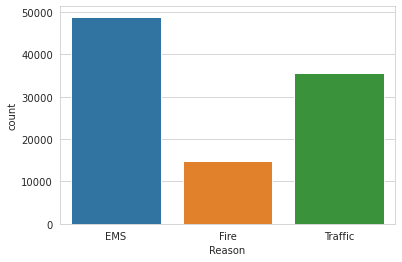

In [15]:
#menggunakan 'seaborn' untuk membuat 'countplot' (grafik) dari dataframe 911 berdasarkan 'Reason'
sns.countplot(x='Reason',data=df)

#anda bisa custom warna, bentuk grafik dll, untuk panduan detailnya bisa tempatkan kursor di dalam atau sebelum tanda kurung () diatas lalu tekan 'shift + tab'

In [73]:
#membuat kolom baru untuk 'timestamp' agar data lebih clean dan terkategori, berikut step-step nya:

#step1 : konversi 'string' ke 'object' menngunakan pd.to_datetime
#step2 : menggunakan dataframe 'time' pada timestamp
#step3 : Membuat kategori timestamp

In [16]:
#contoh step1:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
#contoh step2:
time = df['timeStamp'].iloc[0]
time.year

#time.year = untuk tahun
#time.hour = untuk jam
#time.month = untuk bulan
#time.week = untuk bulan
#time.dayofweek = untuk hari


2015

In [18]:
#step3 :membuat Kategori timestamp; year, hour, month dan dayofweek

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour) #Hour
df['Year'] = df['timeStamp'].apply(lambda time: time.year) #Year
df['Month'] = df['timeStamp'].apply(lambda time: time.month) #Month
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek) #Day


In [19]:
#step4 : cek data (top 10) pakai .value_counts.head(10)

df['Day of Week'].value_counts().head(10) 

#df['Hour'].value_counts().head()
#df['Year'].value_counts().head() 
#df['Month'].value_counts().head()
#df['Day of Week'].value_counts().head()


1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

In [21]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Year,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,2015,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,2015,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,2015,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,2015,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,2015,12,3


In [26]:
#Merubah 'Day of Week' menjadi lebih 'clean' yaitu hari yang lebih spesifik 
#menggunakan .map() dan formulasi dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

In [28]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Year,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,2015,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,2015,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,2015,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,2015,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,2015,12,Thu


In [83]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

'2015-12-10 17:40:00'

<AxesSubplot:xlabel='Hour', ylabel='count'>

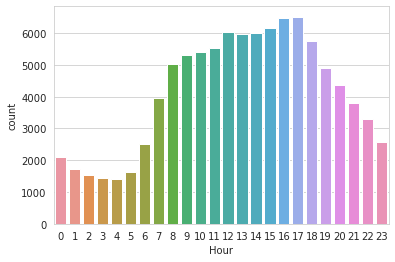

In [32]:
sns.countplot(x='Hour',data=df)

In [36]:
#setelah data-data sudah dapat dianalisis sedikit lebih 'clean' maka, datanya dapat disimpan 'nama baru' atau 'replace' data sebelumnya

df.to_csv('mydata_911',index=False)

In [38]:
#untuk cek data
pd.read_csv('mydata_911')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Year,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,2015,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,2015,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,2015,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,2015,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,2015,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,2016,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,2016,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,2016,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,2016,8,Wed
